In [ ]:
import os

import pandas as pd

from urllib.request import urlretrieve
from subprocess import call

import cv2

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import shutil
from shutil import move


%matplotlib inline

In [ ]:
#create base direcotry
base_dir = os.getcwd()
base_dir

'/content'

In [ ]:
#generate path for raw and processed data

extraction_point = os.path.join(base_dir, 'data', 'extraction_raw')
processed_path = os.path.join(base_dir, 'data', 'processed')

os.makedirs(extraction_point)
os.makedirs(processed_path)

In [ ]:
#download the dataset

dataset_url = 'http://aisdatasets.informatik.uni-freiburg.de/freiburg_groceries_dataset/freiburg_groceries_dataset.tar.gz'

print('Downloading dataset')
urlretrieve(dataset_url,'freiburg_groceries_dataset')
#urlretrieve(url, filename=None) returns filename

print('Extracting Dataset')
call(['tar','-xf','freiburg_groceries_dataset','-C',extraction_point])

os.remove('freiburg_groceries_dataset')
print('Done')

Extracting Dataset
Done


In [ ]:
os.listdir('data/extraction_raw')

['images']

In [ ]:
os.listdir('data/extraction_raw/images')

['BEANS',
 'COFFEE',
 'CAKE',
 'CORN',
 'VINEGAR',
 'TOMATO_SAUCE',
 'CHIPS',
 'OIL',
 'TEA',
 'SUGAR',
 'FISH',
 'SPICES',
 'PASTA',
 'CHOCOLATE',
 'CANDY',
 'SODA',
 'FLOUR',
 'HONEY',
 'RICE',
 'WATER',
 'MILK',
 'NUTS',
 'CEREAL',
 'JUICE',
 'JAM']

In [ ]:
os.listdir('data/extraction_raw/images/CHIPS')

['CHIPS0048.png',
 'CHIPS0108.png',
 'CHIPS0039.png',
 'CHIPS0150.png',
 'CHIPS0117.png',
 'CHIPS0147.png',
 'CHIPS0131.png',
 'CHIPS0025.png',
 'CHIPS0007.png',
 'CHIPS0121.png',
 'CHIPS0082.png',
 'CHIPS0153.png',
 'CHIPS0057.png',
 'CHIPS0089.png',
 'CHIPS0180.png',
 'CHIPS0019.png',
 'CHIPS0043.png',
 'CHIPS0160.png',
 'CHIPS0061.png',
 'CHIPS0146.png',
 'CHIPS0129.png',
 'CHIPS0144.png',
 'CHIPS0174.png',
 'CHIPS0054.png',
 'CHIPS0126.png',
 'CHIPS0028.png',
 'CHIPS0086.png',
 'CHIPS0002.png',
 'CHIPS0172.png',
 'CHIPS0151.png',
 'CHIPS0034.png',
 'CHIPS0137.png',
 'CHIPS0154.png',
 'CHIPS0133.png',
 'CHIPS0036.png',
 'CHIPS0012.png',
 'CHIPS0125.png',
 'CHIPS0000.png',
 'CHIPS0068.png',
 'CHIPS0018.png',
 'CHIPS0098.png',
 'CHIPS0047.png',
 'CHIPS0063.png',
 'CHIPS0099.png',
 'CHIPS0134.png',
 'CHIPS0103.png',
 'CHIPS0135.png',
 'CHIPS0044.png',
 'CHIPS0075.png',
 'CHIPS0053.png',
 'CHIPS0173.png',
 'CHIPS0164.png',
 'CHIPS0077.png',
 'CHIPS0102.png',
 'CHIPS0168.png',
 'CHIPS001

In [ ]:
image_path = 'data/extraction_raw/images/CHIPS/CHIPS0003.png'
image_matrix = cv2.imread(image_path)
image_matrix.shape

(256, 256, 3)

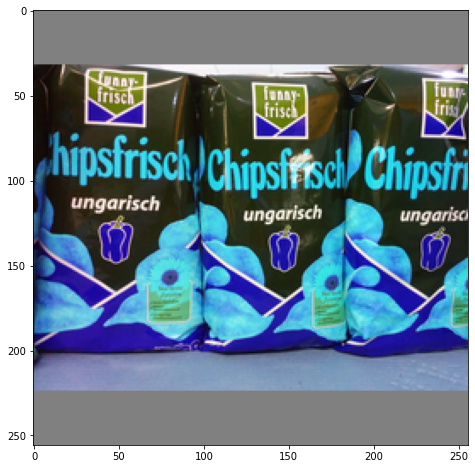

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(image_matrix)

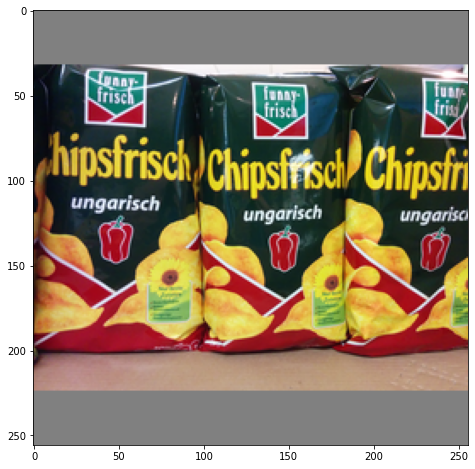

In [ ]:
plt.figure(figsize = (15,8))
plt.imshow(cv2.cvtColor(image_matrix, cv2.COLOR_RGB2BGR))

In [ ]:
image_folder = os.path.join(extraction_point, 'images')


In [ ]:
def directory_system_generator(source_directory, sink_directory):
  train_path = os.path.join(sink_directory, 'train')
  test_path = os.path.join(sink_directory, 'test')
  classes = os.listdir(source_directory)

  train_class_paths = [os.path.join(train_path, class_) for class_ in classes]
  test_class_paths = [os.path.join(test_path, class_) for class_ in classes]

  print('Working on train directory')

  try:
    list(map(os.makedirs, train_class_paths))
  except Exception as e:
    print('Directory already Exist')

  print('Working on Test Directory')

  try:
    list(map(os.makedirs, test_class_paths))
  except Exception as e:
    print('Directory already Exist')

  print('*'*112)
  print('Successfully Done')

  return train_path, test_path, classes

In [ ]:
train_path, test_path, classes = directory_system_generator(source_directory= image_folder, sink_directory=processed_path)

Working on train directory
Working on Test Directory
****************************************************************************************************************
Successfully Done


In [ ]:
def file_mover(source_directory, sink_directory, classes, test_size = 0.2, random_state = 42, format = '.png' ):

  for class_ in classes:
    print(f'Working on {class_}')

    class_source_path = os.path.join(source_directory, class_ )

    all_images = [images for images in os.listdir(class_source_path) if images.endswith(format)]
    print(f'Total Images found in class {class_}: {len(all_images)}')

    all_images = pd.Series(all_images)

    train_images, test_images = train_test_split(all_images, test_size = test_size, random_state= random_state)

    train_source_path = [os.path.join(class_source_path, image) for image in train_images]
    train_data_sink = os.path.join(sink_directory, 'train', class_)
    train_sink_path = [os.path.join(train_data_sink, image) for image in test_images]

    test_source_path = [os.path.join(class_source_path,image) for image in test_images]
    test_data_sink = os.path.join(sink_directory, 'test', class_)
    test_sink_path = [os.path.join(test_data_sink, image) for image in test_images]


    list(map(move, train_source_path, train_sink_path))
    list(map(move, test_source_path, test_sink_path))

    print('All Images move successfully')
    print('*'*112)
  print('Done')

In [ ]:
file_mover(source_directory = image_folder, sink_directory = processed_path, classes = classes)

Working on BEANS
Total Images found in class BEANS: 136
All Images move successfully
****************************************************************************************************************
Working on COFFEE
Total Images found in class COFFEE: 298
All Images move successfully
****************************************************************************************************************
Working on CAKE
Total Images found in class CAKE: 161
All Images move successfully
****************************************************************************************************************
Working on CORN
Total Images found in class CORN: 97
All Images move successfully
****************************************************************************************************************
Working on VINEGAR
Total Images found in class VINEGAR: 157
All Images move successfully
****************************************************************************************************************
Working o

In [ ]:
# Model Building

SEED = 64
BATCH_SIZE = 64
TARGET_SIZE = (256,265)

train_data_generator = ImageDataGenerator(rescale = 1/255,
                                          zoom_range = 0.3,
                                          height_shift_range = 0.2,
                                          width_shift_range = 0.2,
                                          shear_range = 0.2,
                                          horizontal_flip = True,
                                          vertical_flip = True,
                                          fill_mode = 'nearest')

train_data = train_data_generator.flow_from_directory(directory = train_path,
                                  target_size = TARGET_SIZE,
                                  batch_size = BATCH_SIZE,
                                  seed = SEED,
                                  classes = classes,
                                  class_mode = 'categorical')

test_data_generator = ImageDataGenerator(rescale = 1/255,
                                         zoom_range = 0.3,
                                         height_shift_range = 0.2,
                                         width_shift_range = 0.2,
                                         shear_range = 0.2,
                                         vertical_flip = True,
                                         horizontal_flip =True,
                                         fill_mode ='nearest')

test_data = test_data_generator.flow_from_directory(directory = test_path,
                                seed = SEED,
                                batch_size = BATCH_SIZE,
                                target_size = TARGET_SIZE,
                                classes = classes,
                                class_mode = 'categorical')

Found 1002 images belonging to 25 classes.
Found 1002 images belonging to 25 classes.


In [ ]:
# CNN Building

In [ ]:
#Activation Function
elu = tf.keras.layers.ELU()

#Model Building
cnn = tf.keras.Sequential()

#Adding the input layer
cnn.add(tf.keras.layers.Input(shape= (265,256,3)))

# Adding conventional layer_1
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, padding = 'same'))

# Adding MaxPool Layer_1
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, padding = 'same'))

#adding conventional layer_2
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'same'))

#adding convetional layer_3
cnn.add(tf.keras.layers.Conv2D(filters = 128, kernel_size = 3, padding = 'same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, padding = 'same'))


#flattern the features
cnn.add(tf.keras.layers.Flatten())

#Add ANN

#adding the Hidden layers for ANN
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 256, activation = 'relu', kernel_initializer = 'he_normal'))
cnn.add(tf.keras.layers.Dense(units = 512, activation = 'relu', kernel_initializer = 'he_normal'))

#adding the output layer for ANN
cnn.add(tf.keras.layers.Dense(units= len(classes), activation ='softmax', kernel_initializer = 'glorot_normal'))

#compile the model

cnn.compile(optimizer = 'Adam',
            loss = 'categorical_crossentropy',
            metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 265, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 133, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 133, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 67, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 67, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 32, 128)      0

In [ ]:
# cnn_history = cnn.fit_generator(generator = train_data,
#                       validation_data = test_data,
#                       epochs = 50,
#                       use_multiprocessing = True,
#                       workers = 40)

cnn_history = cnn.fit_generator(generator= train_data,
                                validation_data = test_data,
                                epochs = 50,
                                use_multiprocessing = True,
                                workers = 40)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  # This is added back by InteractiveShellApp.init_path()


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 12.5946 - accuracy: 0.0639 

Process Keras_worker_ForkPoolWorker-81:
Process Keras_worker_ForkPoolWorker-86:
Process Keras_worker_ForkPoolWorker-110:
Process Keras_worker_ForkPoolWorker-73:
Process Keras_worker_ForkPoolWorker-45:
Process Keras_worker_ForkPoolWorker-77:
Process Keras_worker_ForkPoolWorker-119:
Process Keras_worker_ForkPoolWorker-51:
Process Keras_worker_ForkPoolWorker-56:
Process Keras_worker_ForkPoolWorker-53:
Process Keras_worker_ForkPoolWorker-113:
Process Keras_worker_ForkPoolWorker-87:
Process Keras_worker_ForkPoolWorker-66:
Process Keras_worker_ForkPoolWorker-117:
Process Keras_worker_ForkPoolWorker-85:
Process Keras_worker_ForkPoolWorker-101:
Process Keras_worker_ForkPoolWorker-70:
Process Keras_worker_ForkPoolWorker-103:
Process Keras_worker_ForkPoolWorker-52:
Process Keras_worker_ForkPoolWorker-42:
Process Keras_worker_ForkPoolWorker-109:
Process Keras_worker_ForkPoolWorker-82:
Process Keras_worker_ForkPoolWorker-79:
Process Keras_worker_ForkPoolWorker-50:
Process Keras_worker_ForkPoolWork

KeyboardInterrupt: ignored